In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

path = "../organised_output/x_beta_inter_cluster_true/summary_output.csv"

In [2]:
def change_name(name):
    if "++" in name:
        return "greedy insert ++"
    elif "iterative" in name:
        if "borda" in name:
            return "iterative voting (borda)"
        elif "popularity" in name:
            return "iterative voting (popularity)"
    elif "tsp" in name:
        return "tsp"
    else:
        return "greedy insert"

df = pd.read_csv(path, header=0)
df['algorithm'] = df['algorithm'].transform(lambda x: change_name(x))
df['beta_mean'] = df['alpha'] / (df['alpha'] + df['beta'])
df.columns = df.columns.str.replace('_',' ')

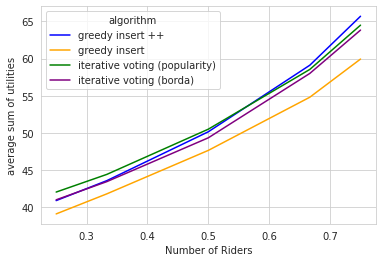

In [5]:
fig, ax = plt.subplots()
sns.lineplot(data=df, ax=ax, x='beta mean', y='avg utilitarian', hue="algorithm", palette=['blue', 'orange', 'green', 'purple'])
ax.set(xlabel="Number of Riders")
ax.set(ylabel="average sum of utilities")
plt.savefig("../../papers/figures/x_beta_inter_cluster_y_utilitarian.png")

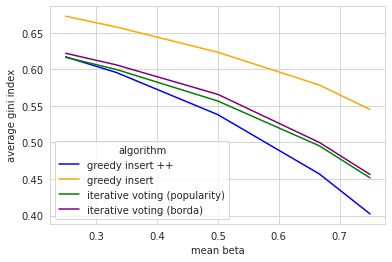

In [4]:
fig, ax = plt.subplots()
sns.lineplot(data=df, ax=ax, x='beta mean', y='avg gini index', hue="algorithm", palette=['blue', 'orange', 'green', 'purple'])
ax.set(xlabel="mean beta")
ax.set(ylabel="average gini index")
plt.savefig("../../papers/figures/x_beta_inter_cluster_y_gini.png")